# Статистика

![](https://i.stack.imgur.com/c88K3.png)

## Подготовка

In [3]:
# !pip install statsmodels --upgrade

In [2]:
# Dependencies

# Standard Dependencies
import os
import numpy as np
import pandas as pd
from math import sqrt

# Visualization
from pylab import *
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from statistics import median
from scipy import signal
from scipy.special import factorial
import scipy.stats as stats
from scipy.stats import sem, binom, lognorm, poisson, bernoulli, spearmanr
from scipy.fftpack import fft, fftshift

# Scikit-learn for Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# dataset
df = pd.read_csv('toy_dataset.csv')

## Дискретные и непрерывные переменные

Дискретная переменная - это переменная, которая может принимать только определенное количество значений. Если вы можете подсчитать количество элементов, то это дискретная переменная. Пример дискретной переменной - результат игры в кости. Он может иметь только 1 и 6 различных возможных результатов и поэтому является дискретным.

Непрерывная переменная может принимать бесконечное количество значений. Примером непрерывной переменной является длина. Длина может быть измерена в произвольной степени.

В статистике мы представляем распределение дискретных переменных с помощью функции вероятности (PMF) и функции распределения (CDF). Мы представляем распределения непрерывных переменных с помощью плотности вероятности (PDF) и CDF.

PMF определяет вероятность всех возможных значений x случайной величины. PDF то же самое, но для непрерывных значений.
CDF представляет вероятность того, что случайная переменная X будет иметь результат, меньший или равный значению x. CDF используется как для дискретных, так и для непрерывных распределений.

Функции, описывающие PMF, PDF и CDF, могут поначалу показаться довольно сложными, но их визуальные аналоги выглядят довольно интуитивно.

### PMF - Функция вероятности

Здесь мы визуализируем PMF биномиального распределения. Вы можете видеть, что все возможные значения - целые числа. Например, нет значений от 50 до 51.

Формула PMF биномиального распределения:
![](http://reliabilityace.com/formulas/binomial-pmf.png)

Данное распределение характеризуется двумя параметрами: целым числом n>0, называемым числом испытаний, и вещественным числом p,0<=p<=1, называемом вероятностью успеха в одном испытании. Биномиальное распределение — одно из основных распределений вероятностей, связанных с последовательностью независимых испытаний. Если проводится серия из n независимых испытаний, в каждом из которых может произойти "успех" с вероятностью p, то случайная величина, равная числу успехов во всей серии, имеет указанное распределение. Эта величина также может быть представлена в виде суммы X=X1+...+X_n независимых слагаемых, имеющих распределение Бернулли.

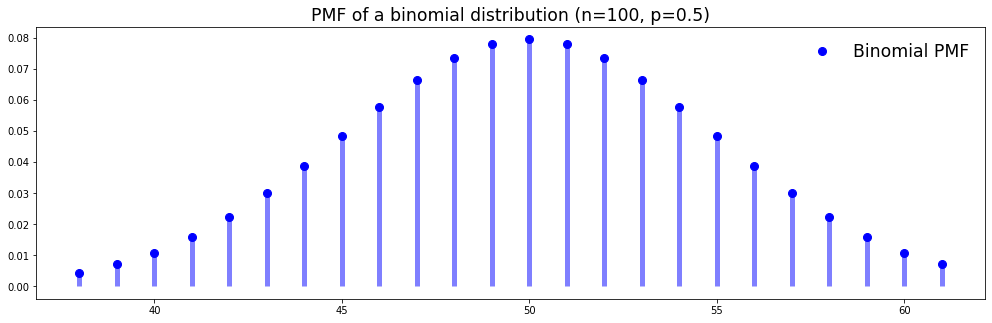

In [8]:
# PMF Visualization
n = 100
p = 0.5

fig, ax = plt.subplots(1, 1, figsize=(17,5))
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='Binomial PMF')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
rv = binom(n, p)
#ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen PMF')
ax.legend(loc='best', frameon=False, fontsize='xx-large')
plt.title('PMF of a binomial distribution (n=100, p=0.5)', fontsize='xx-large')
plt.show()

### PDF - Плотность вероятности

PDF то же, что и PMF, но непрерывна. Можно сказать, что распределение имеет бесконечное количество возможных значений. Здесь мы визуализируем стандартное нормальное распределение со средним значением 0 и стандартным отклонением 1.

Формула PDF нормального распределения:

![](https://www.mhnederlof.nl/images/normalpdf.jpg)

где 
μ (мю) и σ (сигма) — параметры: математическое ожидание и среднеквадратичное отклонение.

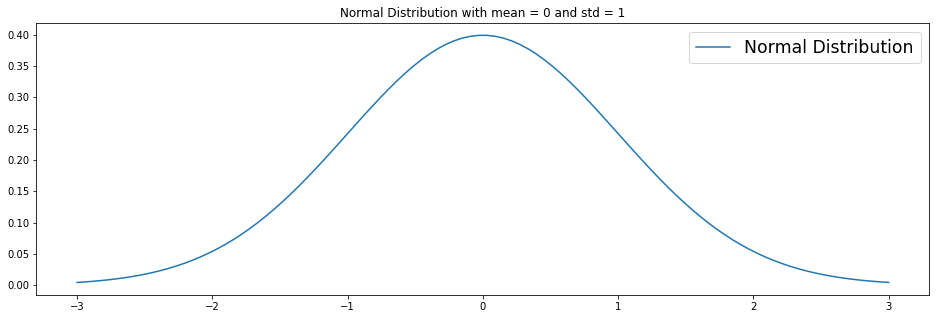

In [9]:
# Plot normal distribution
mu = 0
variance = 1
sigma = sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.figure(figsize=(16,5))
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='Normal Distribution')
plt.title('Normal Distribution with mean = 0 and std = 1')
plt.legend(fontsize='xx-large')
plt.show()

### CDF - Функция распределения

Функция распределения CDF отображает вероятность того, что случайная величина X примет значение, меньшее или равное значению x(P(X ≤ x)). CDF могут быть дискретными или непрерывными. В этом разделе мы визуализируем непрерывный случай. Вы можете видеть на графике, что CDF накапливает все вероятности и, следовательно, ограничен между 0 ≤ x ≤ 1.

CDF нормального распределения в виде формулы:
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/187f33664b79492eedf4406c66d67f9fe5f524ea)

Функция ошибок: вероятность того, что нормальная случайная величина со средним 0 и вариацией 1/2 попадёт в отрезок [-x,x]

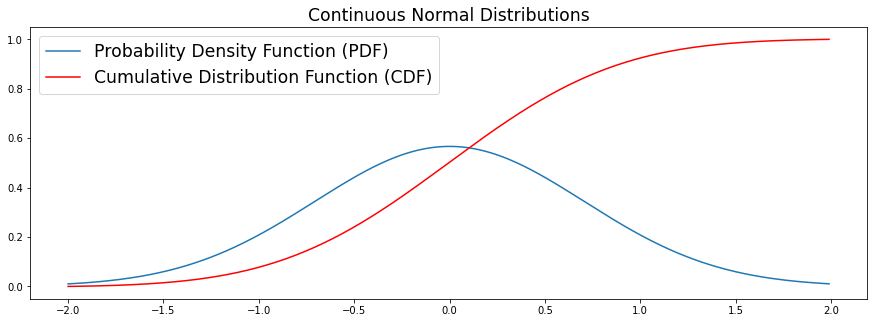

In [10]:
# Data
X  = np.arange(-2, 2, 0.01)
Y  = exp(-X ** 2)

# Normalize data
Y = Y / (0.01 * Y).sum()

# Plot the PDF and CDF
plt.figure(figsize=(15,5))
plt.title('Continuous Normal Distributions', fontsize='xx-large')
plot(X, Y, label='Probability Density Function (PDF)')
plot(X, np.cumsum(Y * 0.01), 'r', label='Cumulative Distribution Function (CDF)')
plt.legend(fontsize='xx-large')
plt.show()

## Распределения

Распределение вероятностей говорит нам кое-что о вероятности каждого значения случайной величины.

Случайная величина X - это функция, которая сопоставляет события с действительными числами.

Визуализация в этом разделе представляет собой дискретные распределения. Однако многие из этих распределений также могут быть непрерывными.

### Равномерное распределение

Равномерное распределение довольно простое. Каждое значение имеет «равновозможность исходов». Таким образом, распределение состоит из случайных значений без каких-либо закономерностей. В этом примере мы генерируем случайные плавающие числа от 0 до 1.

PDF:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/648692e002b720347c6c981aeec2a8cca7f4182f)

CDF:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eeeeb233753cfe775b24e3fec2f371ee8cdc63a6)

In [11]:
# Uniform distribution (between 0 and 1)
uniform_dist = np.random.random(1000)
uniform_df = pd.DataFrame({'value' : uniform_dist})
uniform_dist = pd.Series(uniform_dist)

Text(0.5, 1.0, 'Scatterplot of a Random/Uniform Distribution')

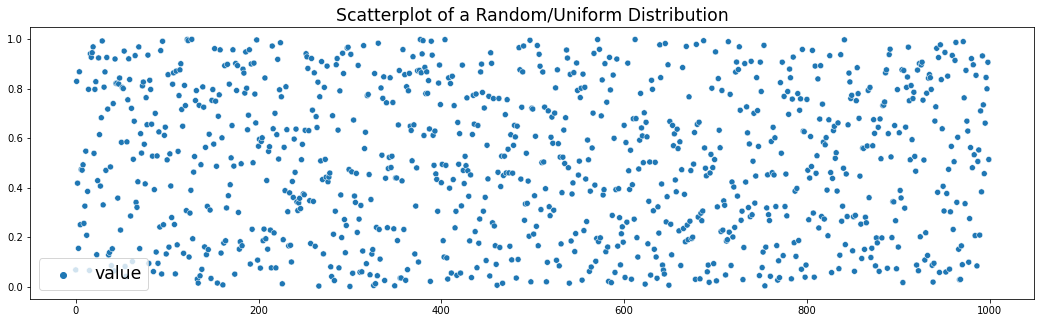

In [12]:
plt.figure(figsize=(18,5))
sns.scatterplot(data=uniform_df)
plt.legend(fontsize='xx-large')
plt.title('Scatterplot of a Random/Uniform Distribution', fontsize='xx-large')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Random/Uniform distribution')

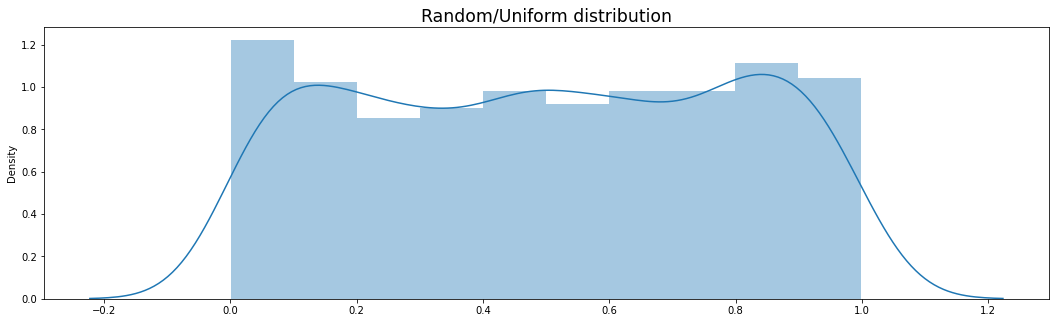

In [13]:
plt.figure(figsize=(18,5))
sns.distplot(uniform_df)
plt.title('Random/Uniform distribution', fontsize='xx-large')

### Нормальное распределение

Нормальное распределение (также называемое распределением Гаусса или Гаусса-Лапласа, колоколообразная кривая) очень распространено и удобно. В основном это связано с Центральной предельной теоремой (CLT), в которой говорится, что при большом количестве независимых случайных величин (например, подбрасывание монеты) распределение имеет тенденцию к нормальному распределению.

PDF:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/2ce7e315b02666699e0cd8ea5fb1a3e0c287cd9d)

CDF:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/187f33664b79492eedf4406c66d67f9fe5f524ea)


In [17]:
# Generate Normal Distribution
normal_dist = np.random.randn(10000)
normal_df = pd.DataFrame({'value' : normal_dist})
# Create a Pandas Series for easy sample function
normal_dist = pd.Series(normal_dist)

normal_dist2 = np.random.randn(10000)
normal_df2 = pd.DataFrame({'value' : normal_dist2})
# Create a Pandas Series for easy sample function
normal_dist2 = pd.Series(normal_dist)

normal_df_total = pd.DataFrame({'value1' : normal_dist, 
                                'value2' : normal_dist2})

Text(0.5, 1.0, 'Scatterplot of a Normal Distribution')

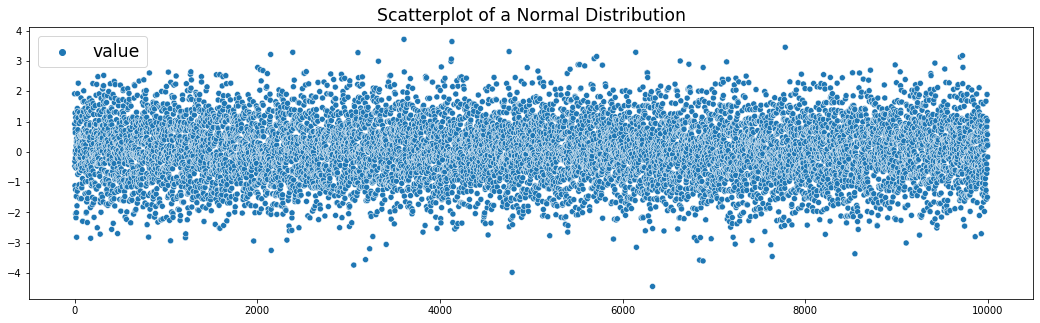

In [18]:
# Scatterplot
plt.figure(figsize=(18,5))
sns.scatterplot(data=normal_df)
plt.legend(fontsize='xx-large')
plt.title('Scatterplot of a Normal Distribution', fontsize='xx-large')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normal distribution (n=1000)')

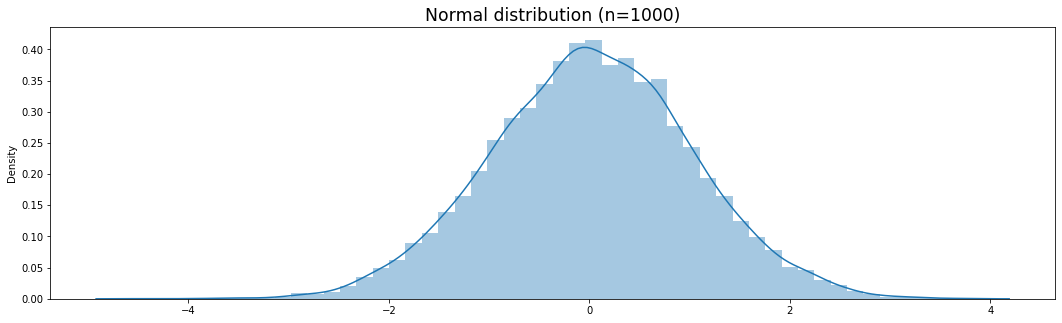

In [19]:
# Normal Distribution as a Bell Curve
plt.figure(figsize=(18,5))
sns.distplot(normal_df)
plt.title('Normal distribution (n=1000)', fontsize='xx-large')

### Биномиальное распределение

Биномиальное распределение имеет количество результатов которое возможно подсчитать и поэтому является дискретным.

**Биномиальные распределения должны соответствовать 3 следующим критериям:**

1. Количество наблюдений или испытаний фиксировано. Другими словами, вы можете определить вероятность того, что что-то произойдет, только если вы сделаете это определенное количество раз.
2. Каждое наблюдение или испытание независимо. Другими словами, ни одно из ваших испытаний не влияет на вероятность следующего испытания.
3. Вероятность успеха одинакова от одного испытания к другому.

Интуитивно понятное объяснение биномиального распределения - это подбрасывание монеты 10 раз. Если у нас есть монета, наш шанс получить орел (p) равен 0,50. Теперь бросаем монету 10 раз и считаем, сколько раз выпадет орел. В большинстве ситуаций мы получаем орла 5 раз, но есть еще одна разница, когда мы получаем орел 9 раз. PMF биномиального распределения даст эти вероятности, если мы скажем N = 10 и p = 0,5. Мы говорим, что x для орла равен 1, а для решки - 0.

PMF:

![](http://reliabilityace.com/formulas/binomial-pmf.png)

CDF:

![](http://reliabilityace.com/formulas/binomial-cpf.png)

**Распределение Бернулли** - это частный случай биномиального распределения.

Распределе́ние Берну́лли в теории вероятностей и математической статистике — дискретное распределение вероятностей, моделирующее случайный эксперимент произвольной природы, при заранее известной вероятности успеха или неудачи.

Все значения в распределении Бернулли равны 0 или 1.

Например, если мы возьмем кривую монету, которая выпадает орлом в 60% случаев, мы можем описать распределение Бернулли следующим образом:

p (орел) = 0.6

1 - p (решка) = 0.4

орел = 1

решка = 0

Формально мы можем описать распределение Бернулли с помощью следующей PMF:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/a9207475ab305d280d2958f5c259f996415548e9)


<ipython-input-22-b0539bc105ee>:12: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=(0.85,300),
<ipython-input-22-b0539bc105ee>:16: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=(-0.2,300),


Text(0.5, 1.0, 'Bernoulli Distribution: p = 0.6, n = 1000')

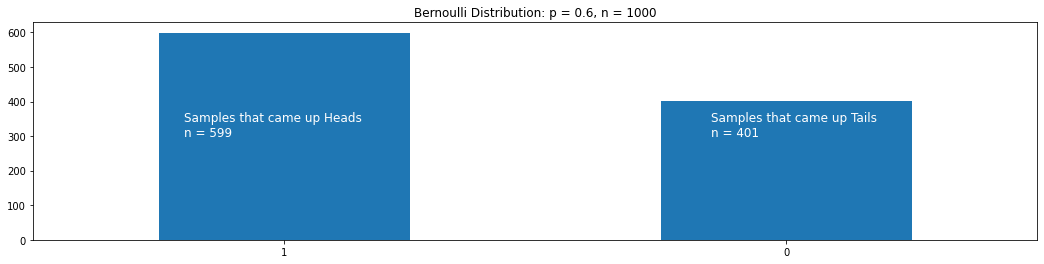

In [22]:
# Change of heads (outcome 1)
p = 0.6

# Create Bernoulli samples
bern_dist = bernoulli.rvs(p, size=1000)
bern_df = pd.DataFrame({'value' : bern_dist})
bern_values = bern_df['value'].value_counts()

# Plot Distribution
plt.figure(figsize=(18,4))
bern_values.plot(kind='bar', rot=0)
plt.annotate(xy=(0.85,300), 
             s='Samples that came up Tails\nn = {}'.format(bern_values[0]), 
             fontsize='large', 
             color='white')
plt.annotate(xy=(-0.2,300), 
             s='Samples that came up Heads\nn = {}'.format(bern_values[1]), 
             fontsize='large', 
             color='white')
plt.title('Bernoulli Distribution: p = 0.6, n = 1000')

In [23]:
bern_dist = bernoulli.rvs(p, size=1000)

### Распределение пуассона

Распределение Пуассона - это дискретное распределение, которое широко используется для моделирования того, сколько раз событие происходит в интервале времени или пространства, при условии, что данные события происходят с некоторой фиксированной средней интенсивностью и независимо друг от друга.

Он принимает значение лямбда, равное среднему значению распределения.

PMF: 
![](https://study.com/cimages/multimages/16/poisson1a.jpg)

CDF: 
![](http://www.jennessent.com/images/cdf_poisson.gif)

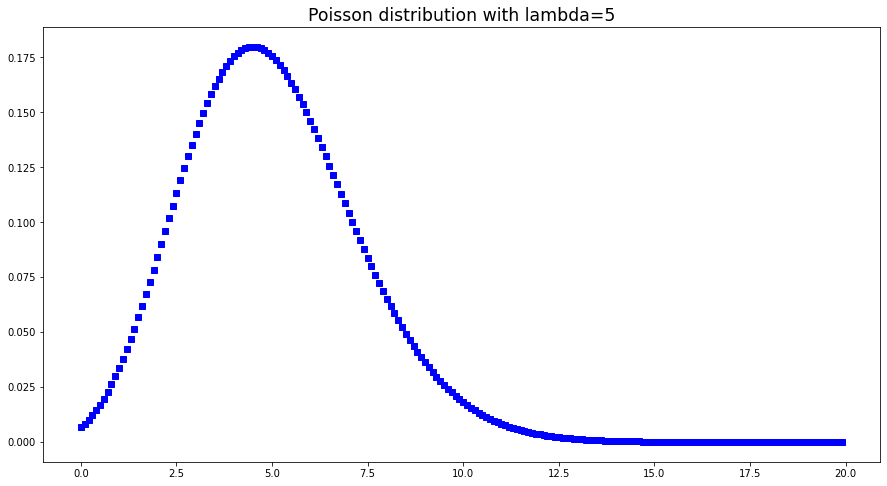

In [24]:
x = np.arange(0, 20, 0.1)
y = np.exp(-5)*np.power(5, x)/factorial(x)

plt.figure(figsize=(15,8))
plt.title('Poisson distribution with lambda=5', fontsize='xx-large')
plt.plot(x, y, 'bs')
plt.show()

## Логнормальное распределение

Логнормальное распределение является непрерывным. Основная характеристика логарифмически нормального распределения состоит в том, что его логарифм имеет нормальное распределение. Его также называют распределением Гальтона.

PDF: 

![](https://www.mhnederlof.nl/images/lognormaldensity.jpg)

CDF:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/29095d9cbd6539833d549c59149b9fc5bd06339b)

Где Фи - это CDF стандартного нормального распределения.

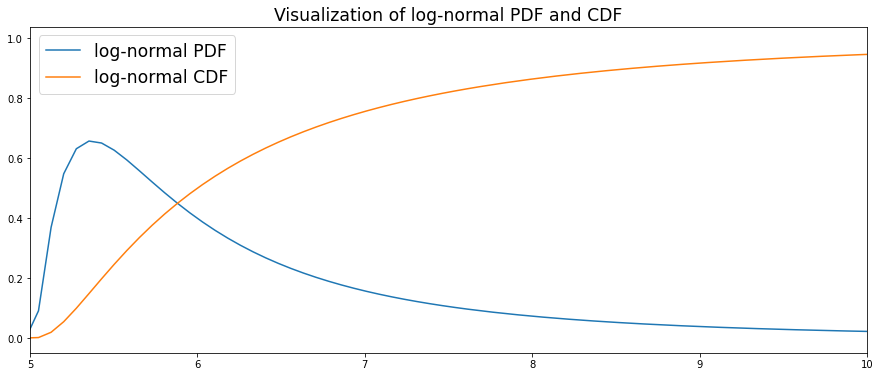

In [25]:
# Specify standard deviation and mean
std = 1
mean = 5

# Create log-normal distribution
dist=lognorm(std,loc=mean)
x=np.linspace(0,15,200)

# Visualize log-normal distribution
plt.figure(figsize=(15,6))
plt.xlim(5, 10)
plt.plot(x,dist.pdf(x), label='log-normal PDF')
plt.plot(x,dist.cdf(x), label='log-normal CDF')
plt.legend(fontsize='xx-large')
plt.title('Visualization of log-normal PDF and CDF', fontsize='xx-large')
plt.show()

## Summary Statistics и моменты случайной величины

**Mean, Median and Mode** 

mean так же называется начальный момент.


![](https://qph.fs.quoracdn.net/main-qimg-29a4925034e075f16e1c743a4b3dda8b)
![](https://elementy.ru/images/eltpub/statistika_i_kotiki_03_703.jpg)
![](https://elementy.ru/images/eltpub/statistika_i_kotiki_02_703.jpg)


### Моменты

Момент - это количественная мера, которая что-то говорит о форме распределения. Есть центральные моменты и не центральные моменты. Этот раздел посвящен центральным моментам.

0-й центральный момент - это полная вероятность и всегда равен 1.

1-й момент - это среднее значение - mean (ожидаемое значение).

Второй центральный момент - это дисперсия.

**Дисперсия** = среднее значение квадрата расстояния от среднего. Дисперсия интересна с математической точки зрения, но стандартное отклонение часто является гораздо лучшей мерой того, насколько разбросано распределение.

![](http://www.visualmining.com/wp-content/uploads/2013/02/analytics_formula_variance.png)

**Стандартное отклонение** = квадратный корень из дисперсии

![](http://www.visualmining.com/wp-content/uploads/2013/02/analytics_formula_std_dev.png)

Третий центральный момент - Коэффициент асимметрии.

**Коэффициент асимметрии** = мера, которая описывает контраст одного хвоста по сравнению с другим хвостом. Например, если в вашем распределении больше высоких значений, чем низких значений, тогда ваше распределение «смещено» в сторону высоких значений.

![](http://www.visualmining.com/wp-content/uploads/2013/02/analytics_formula_skewness.png)

Четвертый центральный момент - это коэффицент эксцесса.

**Коэффициент эксцесса** = мера того, насколько «толстые» хвосты в распределении.

![](http://www.visualmining.com/wp-content/uploads/2013/02/analytics_formula_kurtosis.png)

Чем выше момент, тем сложнее оценить с помощью выборки. Для получения точных оценок требуются более крупные выборки.

In [27]:
# Summary
print('Summary Statistics for a normal distribution: ')
# Median
medi = median(normal_dist)
print('Median: ', medi)
display(normal_df.describe())

# Standard Deviation
std = sqrt(np.var(normal_dist))

print('The first four calculated moments of a normal distribution: ')
# Mean
mean = normal_dist.mean()
print('Mean: ', mean)

# Variance
var = np.var(normal_dist)
print('Variance: ', var)

# Return unbiased skew normalized by N-1
skew = normal_df['value'].skew()
print('Skewness: ', skew)

# Return unbiased kurtosis over requested axis using Fisher’s definition of kurtosis 
# (kurtosis of normal == 0.0) normalized by N-1
kurt = normal_df['value'].kurtosis()
print('Kurtosis: ', kurt)

Summary Statistics for a normal distribution: 
Median:  0.024541226214184843


,value
count,10000.000000
mean,0.023169
std,1.000942
min,-4.443069
25%,-0.652902
50%,0.024541
75%,0.690688
max,3.711124


The first four calculated moments of a normal distribution: 
Mean:  0.023169427600786136
Variance:  1.001784239348643
Skewness:  -0.0319649282118415
Kurtosis:  0.060288191652794865


## Bias, MSE и SE

**Bias** - это мера того, насколько среднее значение выборки отклоняется от среднего значения генеральной совокупности. Среднее значение также называется **Математическое ожидание**.

Формула смещения:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/82a9c6501a54260ed0edd2f03923719b9f2db906)

Формула для математического ожидания (EV) показывает, что смещение также можно сформулировать как математическое ожидание за вычетом среднего для генеральной совокупности:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/12828b1f927b39d2fa9d75f82c02b91209182911)



In [28]:
# Take sample
normal_df_sample = normal_df.sample(100)

# Calculate Expected Value (EV), population mean and bias
ev = normal_df_sample.mean()[0]
pop_mean = normal_df.mean()[0]
bias = ev - pop_mean

In [30]:
print('Sample mean (Expected Value): ', ev)
print('Среднее генеральной совокупности: ', pop_mean)
print('Bias: ', bias)

Sample mean (Expected Value):  0.17489514771514866
Среднее генеральной совокупности:  0.023169427600786136
Bias:  0.15172572011436253


**MSE (Mean Squared Error, среднеквадратичная ошибка)** - это формула для измерения того, насколько оценки отклоняются от истинного распределения. Это может быть очень полезно, например, при оценке регрессионных моделей.
![](https://i.stack.imgur.com/iSWyZ.png)


**RMSE (Root Mean Squared Error)** квадратный корень из MSE.


![](http://file.scirp.org/Html/htmlimages/5-2601289x/fcdba7fc-a40e-4019-9e95-aca3dc2db149.png)



In [32]:
from math import sqrt

Y = 100 # Actual Value
YH = 94 # Predicted Value

# MSE Formula 
def MSE(Y, YH):
     return np.square(YH - Y).mean()

# RMSE formula
def RMSE(Y, YH):
    return sqrt(np.square(YH - Y).mean())


print('MSE: ', MSE(Y, YH))

print('RMSE: ', RMSE(Y, YH))

MSE:  36.0
RMSE:  6.0


**Стандартная ошибка(SE)** измеряет, насколько распределение отличается от выборочного среднего.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/650px-Standard_deviation_diagram.svg.png)

Формулу также можно определить как стандартное отклонение, деленное на квадратный корень из объема выборки.

![](https://toptipbio.com/wp-content/uploads/2017/07/Standard-error-formula.jpg)

In [33]:
# Standard Error (SE)
uni_sample = uniform_dist.sample(100)
norm_sample = normal_dist.sample(100)

print('Standard Error of uniform sample: ', sem(uni_sample))
print('Standard Error of normal sample: ', sem(norm_sample))

# The random samples from the normal distribution should have a higher standard error

Standard Error of uniform sample:  0.029688697231759636
Standard Error of normal sample:  0.09379141209017865


## Методы сэмплирования

**Нерепрезентативная выборка:**

Удобная выборка - один из видов вероятностной выборки, представляет собой результат отбора образцов из генеральной совокупности, при котором процедура выборки соответствует общим требованиям проведения исследования, при этом не предъявляя требования к репрезентативности выборки и оценки вероятности. Как правило критерии выборки определяются исходя из удобства проведения процедуры выборки

С помощью такой выборки нельзя научно сделать обобщение, потому что свойства такой выборки не отражают свойства генеральной совокупности.

Например, если опрос проводится в торговом центре ранним утром только один день, то его результаты не представляют мнения других членов общества, как это было бы если бы опрос проводился в разное время суток и несколько раз в неделю.

Haphazard Sampling - Выборка создается не задумываясь об этом. Это часто создает иллюзию, что вы создаете выборку рандомно.

Целенаправленный отбор образцов - отбор образцов для определенной цели. Пример - сосредоточиться на крайних случаях. Это может быть полезно, но накладывает ограничения, потому что не позволяет делать заявления обо всей совокупности.

**Репрезентативная выборка:**

Простая случайная выборка - выборка (псевдо) случайным образом.

Систематическая выборка - отбирать образцы с фиксированным интервалом. Например, каждый 10-й пример (0, 10, 20 и т. д.).

Стратифицированная выборка - выберите одинаковое количество образцов из разных групп в генеральной совокупности.

Кластерная выборка - Разделите совокупность на группы (кластеры) и выберите образцы из этих групп.

In [34]:
# Note that we take very small samples just to illustrate the different sampling methods

print('---Non-Representative samples:---\n')
# Convenience samples
con_samples = normal_dist[0:5]
print('Convenience samples:\n\n{}\n'.format(con_samples))

# Haphazard samples (Picking out some numbers)
hap_samples = [normal_dist[12], normal_dist[55], normal_dist[582], normal_dist[821], normal_dist[999]]
print('Haphazard samples:\n\n{}\n'.format(hap_samples))

# Purposive samples (Pick samples for a specific purpose)
# In this example we pick the 5 highest values in our distribution
purp_samples = normal_dist.nlargest(n=5)
print('Purposive samples:\n\n{}\n'.format(purp_samples))

print('---Representative samples:---\n')

# Simple (pseudo)random sample
rand_samples = normal_dist.sample(5)
print('Random samples:\n\n{}\n'.format(rand_samples))

# Systematic sample (Every 2000th value)
sys_samples = normal_dist[normal_dist.index % 2000 == 0]
print('Systematic samples:\n\n{}\n'.format(sys_samples))

# Stratified Sampling
# We will get 1 person from every city in the dataset
# We have 8 cities so that makes a total of 8 samples
df = pd.read_csv('toy_dataset.csv')

strat_samples = []

for city in df['City'].unique():
    samp = df[df['City'] == city].sample(1)
    strat_samples.append(samp['Income'].item())
    
print('Stratified samples:\n\n{}\n'.format(strat_samples))

# Cluster Sampling
# Make random clusters of ten people (Here with replacement)
c1 = normal_dist.sample(10)
c2 = normal_dist.sample(10)
c3 = normal_dist.sample(10)
c4 = normal_dist.sample(10)
c5 = normal_dist.sample(10)

# Take sample from every cluster (with replacement)
clusters = [c1,c2,c3,c4,c5]
cluster_samples = []
for c in clusters:
    clus_samp = c.sample(1)
    cluster_samples.extend(clus_samp)
print('Cluster samples:\n\n{}'.format(cluster_samples))    


---Non-Representative samples:---

Convenience samples:

0    1.914032
1    0.920907
2   -0.476855
3   -0.316841
4   -1.119071
dtype: float64

Haphazard samples:

[-2.04488687555715, 1.2966098740719665, 2.085578312370852, -0.5590693230562747, -0.014552286234343985]

Purposive samples:

3607    3.711124
4132    3.639000
7782    3.451168
4758    3.309012
6145    3.284773
dtype: float64

---Representative samples:---

Random samples:

6310    0.605164
2599   -1.181590
5184    1.086375
6504   -0.205851
2712    1.076783
dtype: float64

Systematic samples:

0       1.914032
2000    1.430181
4000    0.641309
6000   -0.145905
8000    1.163751
dtype: float64

Stratified samples:

[31852.0, 87479.0, 89094.0, 125029.0, 101211.0, 85161.0, 103712.0, 88727.0]

Cluster samples:

[0.7542360966268549, 0.7515038996200386, 1.1031448444003793, -0.6587836299425698, 1.6717055757633397]


## Ковариация

Ковариация - это мера того, насколько две случайные величины изменяются вместе. Дисперсия похожа на ковариацию в том смысле, что дисперсия показывает, насколько изменяется одна переменная. Ковариация показывает, как две переменные изменяются вместе.

Если две переменные независимы, их ковариация равна 0. Однако ковариация 0 не означает, что переменные независимы.

In [35]:
# Covariance between Age and Income
print('Covariance between Age and Income: ')

df[['Age', 'Income']].cov()

Covariance between Age and Income: 


,Age,Income
Age,133.922426,-3.811863e+02
Income,-381.186341,6.244752e+08


## Корреляция

Корреляция - это стандартизированная версия ковариации. Здесь становится более ясно, что возраст и доход не имеют сильной корреляции в нашем наборе данных.

Формула для коэффициента корреляции Пирсона состоит из ковариации между двумя случайными величинами, деленной на стандартное отклонение первой случайной величины, умноженное на стандартное отклонение второй случайной величины.

Формула для коэффициента корреляции Пирсона:
![](http://sherrytowers.com/wp-content/uploads/2013/09/correlation_xy-300x97.jpg)

In [36]:
# Correlation between two normal distributions
# Using Pearson's correlation
print('Pearson: ')
print(df[['Age', 'Income']].corr(method='pearson'))

# Negatively correlated data
x1 = [1, 3, 3, 4, 6, 7, 7, 9, 10, 10]
x2 = [9.7, 9.3, 7, 6, 7, 7.2, 6, 4.2, 4.5, 4]

# Positively correlated data
y1 = [0, 1, 2, 2.3, 3, 4, 4, 7, 9, 9.5]
y2 = [2.2, 4, 3, 5, 5.3, 5, 7, 9, 5, 10]

# Correlation with NumPy
print('\nx1,x2 correlation: \n', np.corrcoef(x1, x2))
print('\ny1,y2 correlation: \n', np.corrcoef(y1, y2))


Pearson: 
             Age    Income
Age     1.000000 -0.001318
Income -0.001318  1.000000

x1,x2 correlation: 
 [[ 1.         -0.88237093]
 [-0.88237093  1.        ]]

y1,y2 correlation: 
 [[1.        0.7737071]
 [0.7737071 1.       ]]


Другой метод расчета коэффициента корреляции - Спирмена. Формула выглядит иначе, но дает те же результаты, что и метод Пирсона. В этом примере мы почти не видим разницы, но отчасти это связано с тем, очевидно, что столбцы «Возраст» и «Доход» в нашем наборе данных не имеют корреляции.

Формула Спирмена:

![](http://s3.amazonaws.com/hm_120408/fa/3d86/yhf5/9dwq/4m6e2kcav/original.jpg?1447778688)

In [37]:
# Using Spearman's rho correlation
print('Spearman: ')
df[['Age', 'Income']].corr(method='spearman')

Spearman: 


,Age,Income
Age,1.000000,-0.001452
Income,-0.001452,1.000000


## Линейная регрессия

Линейная регрессия может быть выполнена с помощью метода наименьших квадратов (OLS) или оценки максимального правдоподобия (MLE).

Большинство библиотек Python используют OLS применительно к линейным моделям.

![](https://image.slidesharecdn.com/simplelinearregressionpelatihan-090829234643-phpapp02/95/simple-linier-regression-9-728.jpg?cb=1251589640)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Well fitted but not well fitting: Linear regression plot on quadratic data'}>

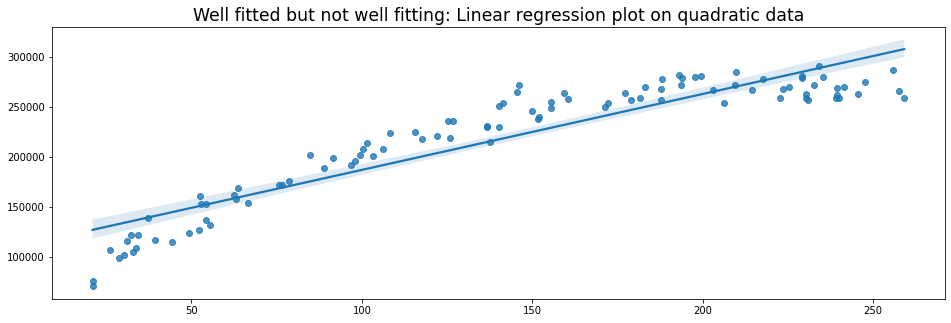

In [38]:
# Generate data
x = np.random.uniform(low=20, high=260, size=100)
y = 50000 + 2000*x - 4.5 * x**2 + np.random.normal(size=100, loc=0, scale=10000)

# Plot data with Linear Regression
plt.figure(figsize=(16,5))
plt.title('Well fitted but not well fitting: Linear regression plot on quadratic data', fontsize='xx-large')
sns.regplot(x, y)

Здесь мы видим, что линейная модель хорошо подходит. Однако линейная модель, вероятно, не идеальна для наших данных, потому что данные соответствуют квадратичной схеме. Модель полиномиальной регрессии лучше соответствует данным, но это выходит за рамки данного курса.

Мы также можем реализовать линейную регрессию с помощью простого подхода. В следующем примере мы измеряем расстояние по вертикали и по горизонтали между точкой случайных данных и линией регрессии.

Slope: 5.154649738664355
Intercept: -8.585836571486329


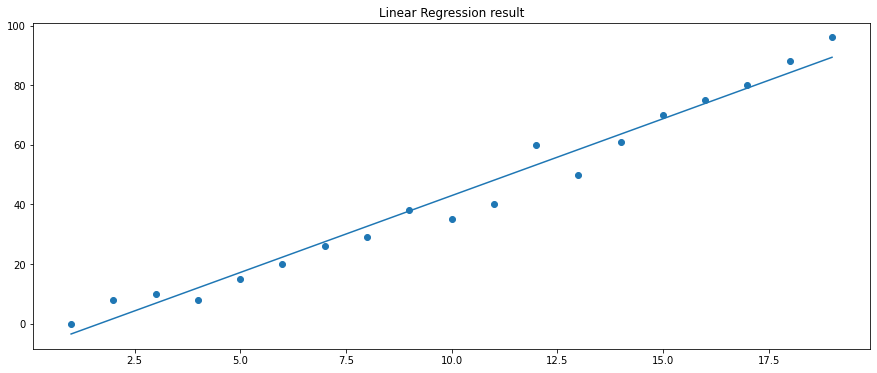

In [39]:
# Linear regression from scratch
import random
# Create data from regression
xs = np.array(range(1,20))
ys = [0,8,10,8,15,20,26,29,38,35,40,60,50,61,70,75,80,88,96]

# Put data in dictionary
data = dict()
for i in list(xs):
    data.update({xs[i-1] : ys[i-1]})

# Slope
m = 0
# y intercept
b = 0
# Learning rate
lr = 0.0001
# Number of epochs
epochs = 100000

# Formula for linear line
def lin(x):
    return m * x + b

# Linear regression algorithm
for i in range(epochs):
    # Pick a random point and calculate vertical distance and horizontal distance
    rand_point = random.choice(list(data.items()))
    vert_dist = abs((m * rand_point[0] + b) - rand_point[1])
    hor_dist = rand_point[0]

    if (m * rand_point[0] + b) - rand_point[1] < 0:
        # Adjust line upwards
        m += lr * vert_dist * hor_dist
        b += lr * vert_dist   
    else:
        # Adjust line downwards
        m -= lr * vert_dist * hor_dist
        b -= lr * vert_dist
        
# Plot data points and regression line
plt.figure(figsize=(15,6))
plt.scatter(data.keys(), data.values())
plt.plot(xs, lin(xs))
plt.title('Linear Regression result')  
print('Slope: {}\nIntercept: {}'.format(m, b))

Коэффициенты линейной модели также могут быть вычислены с использованием MSE (среднеквадратичной ошибки) без итеративного подхода.

### Квартет Энскомба

Квартет Анскомба - это выборка из четырех наборов данных, которые имеют одинаковую описательную статистику и соответствие линейной регрессии. Однако наборы данных сильно отличаются друг от друга.

Это обрисовывает проблему, заключающуюся в том, что, хотя сводная статистика и модели регрессии действительно полезны для понимания ваших данных, вы всегда должны визуализировать данные, чтобы увидеть, что на самом деле происходит. Это также показывает, что несколько выбросов действительно могут испортить вашу модель.

![](https://www.researchgate.net/profile/Arch_Woodside2/publication/286454889/figure/fig3/AS:669434310037526@1536616985820/Anscombes-quartet-of-different-XY-plots-of-four-data-sets-having-identical-averages.png)

## Бутстрэп 

Бутстрэп - это практический компьютерный метод исследования распределения статистик вероятностных распределений, основанный на многократной генерации выборок методом Монте-Карло на базе имеющейся выборки. Позволяет просто и быстро оценивать самые разные статистики (доверительные интервалы, дисперсию, корреляцию и так далее) для сложных моделей.

Допустим, есть у нас интернет-магазин, где мы торгуем всякой всячиной и привлекаем клиентов разными способами. Понятное дело, что мы постоянно что-то тестируем — расположение картинок и кнопок на странице, рекламный текст, AdWords, баннеры на сайтах партнёров и так далее. И вот свежие результаты — в тестовой группе из 893 пришедших у нас что-то купили 34, а в контрольной группе из 923 пришедших что-то купили 28.

Возникает вопрос — идти к начальству и говорить «в тестовой группе конверсия 3.81%, в контрольной группе 3.03%, налицо улучшение на 26%, где моя премия?» или продолжать сбор данных, потому что разница в 6 человек — ещё не статистика?

Эту задачу несложно решить аналитически. Видим две случайные величины (процент конверсии в тестовой и контрольной группе). При большом количестве наблюдений биномиальное распределение похоже на нормальное. Нас интересует разность. Нормальное распределение бесконечно делимо, вычитаем матожидания и складываем дисперсии, получаем матожидание 34/893-28/923 = 0.77% и дисперсию (34/893)*(1-34/893)/893+(28/923)*(1-28/923)/923. Стандартное отклонение равно корню из дисперсии, в нашем случае 0.85%. Истинное значение с 95% вероятностью лежит в пределах плюс-минус двух стандартных отклонений от матожидания, то есть между -0.93% и 2.48%.

Так что премия пока не светит, надо продолжать собирать данные.

Теперь решим эту же задачу бутстрапом. Основная идея такова: хорошо бы повторить наш эксперимент много раз и посмотреть на распределение результатов. Но мы это сделать не можем, поэтому будем действовать нечестно — надёргаем выборок из имеющихся данных и сделаем вид, что каждая из них — результат повторения нашего эксперимента.

Алгоритм:


Выбираем наугад одно наблюдение из имеющихся.
Повторяем пункт 1 столько раз, сколько у нас есть наблюдений. При этом некоторые из них мы выберем несколько раз, некотороые не выберем вообще — это нормально.
Считаем интересующие нас метрики по этой новой выборке. Запоминаем результат.
Повторяем пункты 1-3 много раз. Например, 10 тысяч. Можно меньше, но точность будет хуже. Можно больше, но долго будет считать.


Теперь у нас есть распределение, на которое мы можем посмотреть или что-то по нему посчитать. Например, доверительный интервал, медиану или стандартное отклонение.

Обратите внимание на то, что мы не делаем никаких предположений о распределении чего-либо. Распределения могут быть несимметричными, с толстыми хвостами и вообще иметь причудливую форму. Алгоритм от этого не меняется.

Чудес, правда, не бывает. Если у распределения нет матожидания (такие встречаются), бутстрап его не найдёт. Ну то есть он найдёт матожидание выборки, но не генеральной совокупности. То же касается ситуации, когда выборка нерепрезентативна или просто маленькая.


Means of Bootstrap Samples: 
123751     91992.0
23982      82495.0
136009    116853.0
65170      88571.0
28210      90133.0
99519     112950.0
30731     108020.0
52430     105107.0
20288      98098.0
43362      98580.0
Name: Income, dtype: float64

Mean of the population:  91191.3469
Standard Deviation of the population:  25109.68776663171


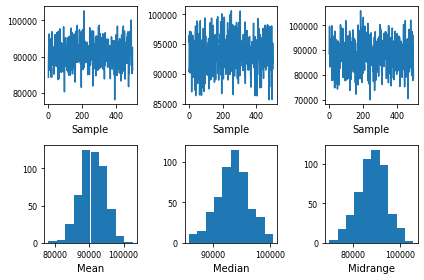

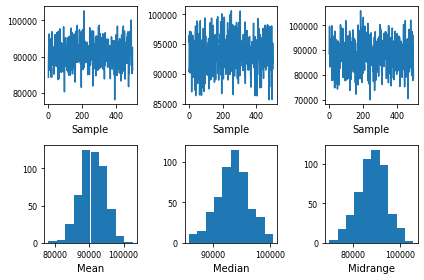

In [40]:
# scikit-learn bootstrap package
from sklearn.utils import resample

# data sample
data = df['Income'].sample(10000)

# prepare bootstrap samples
boot = resample(data, replace=True, n_samples=10, random_state=1)
print('Means of Bootstrap Samples: \n{}\n'.format(boot))
print('Mean of the population: ', data.mean())
print('Standard Deviation of the population: ', data.std())

# Bootstrap plot
pd.plotting.bootstrap_plot(data)

## Проверка гипотез

Мы выдвигаем две гипотезы: H0 (нулевая гипотеза) и Ha (альтернативная гипотеза).

С помощью проверки гипотез мы можем принять четыре разных решения:
1. Отвергнуть H0 и H0 не соответствует действительности (нет ошибки)
2. Не отвергать H0 и H0 истинно (нет ошибки)
3. Отвергнуть H0 и H0 верно (ошибка типа 1)
4. Не отвергать H0 и H0 не соответствует действительности (ошибка типа 2)

Ошибка типа 1 также называется альфа-ошибкой.
Ошибка типа 2 также называется бета-ошибкой.

![](https://lh3.googleusercontent.com/proxy/CmKPT7sfCvGF-yUJU7E-qaGn2sPpft244Aon2JmsKjweBNB_8aa9QZJGsxGtcc90olaK0X8Y3AOb0Wq3rKZToXWihZL79YogjKn63JcHpkLIVPv8hxMjLHl75GYWUT3aBNuOx9epwCbGesrg6XdfGych56WSnjDiNF6dZy8fceth2meaKC2weDGYLxOeqA)

![](https://qph.fs.quoracdn.net/main-qimg-84121cf5638cbb5919999b2a8d928c91)

![](https://i.stack.imgur.com/x1GQ1.png)

**Рассмотрим пример для наглядности.**

#### ROC-анализ

ROC-анализ (от receiver operating characteristic, рабочая характеристика приёмника) — это метод количественного определения применимости некоторого признака к бинарной классификации объектов. Говоря проще, мы можем придумать некоторый способ, как отличить больных людей от здоровых, кошек от собак, черное от белого, а затем проверить правомерность такого способа. Давайте снова обратимся к примеру.

Пусть вы — подающий надежды криминалист, и разрабатываете новый способ скрытно и однозначно определять, является ли человек преступником. Вы придумали количественный признак: оценивать преступные наклонности людей по частоте прослушивания ими Михаила Круга. Но будет ли давать адекватные результаты ваш признак? Давайте разбираться.
Вам понадобится две группы людей для валидации вашего критерия: обычные граждане и преступники. Положим, действительно, среднегодовое время прослушивания ими Михаила Круга различается:

![](https://habrastorage.org/r/w1560/webt/ra/a5/9g/raa59ggxw8chzwvizjapflolsn4.jpeg)

Здесь мы видим, что по количественному признаку времени прослушивания наши выборки пересекаются. Кто-то слушает Круга спонтанно по радио, не совершая преступлений, а кто-то нарушает закон, слушая другую музыку или даже будучи глухим. Какие у нас есть граничные условия? ROC-анализ вводит понятия селективности (чувствительности) и специфичности. Чувствительность определяется как способность выявлять все-все интересующие нас точки (в данном примере — преступников), а специфичность — не захватывать ничего ложноположительного (не ставить под подозрение простых обывателей). Мы можем задать некоторую критическую количественную черту, отделяющую одних от других (оранжевая), в пределах от максимальной чувствительности (зеленая) до максимальной специфичности (красная).
Посмотрим на следующую схему:
![](https://habrastorage.org/r/w1560/webt/kl/ah/i3/klahi333ryu-c9ooqmc2gsypmn0.jpeg)

Смещая значение нашего признака, мы меняем соотношения ложноположительного и ложноотрицательного результатов (площади под кривыми). Точно так же мы можем дать определения Чувствительность = Полож. рез-т/(Полож. рез-т + ложноотриц. рез-т) и Специфичность = Отриц. рез-т/(Отриц. рез-т + ложноположит. рез-т). 

Но главное, мы можем оценить соотношение положительных результатов к ложноположительным на всем отрезке значений нашего количественного признака, что и есть наша искомая ROC-кривая:

![](https://habrastorage.org/r/w1560/webt/rx/ug/dg/rxugdguxqr5gx6jzltpfhkvz-z0.jpeg)

А как нам понять из этого графика, насколько хорош наш признак? Очень просто, посчитать площадь под кривой (AUC, area under curve). Пунктирная линия (0,0; 1,1) означает полное совпадение двух выборок и совершенно бессмысленный критерий (площадь под кривой равна 0,5 от всего квадрата). А вот выпуклость ROC кривой как раз и говорит о совершенстве критерия. Если же нам удастся найти такой критерий, что выборки вообще не будут пересекаться, то площадь под кривой займет весь график. В целом же признак считается хорошим, позволяющим надежно отделить одну выборку от другой, если AUC > 0,75-0,8.

С помощью такого анализа вы можете решать самые разные задачи. Решив, что слишком много домохозяек оказались под подозрением из-за Михаила Круга, а кроме того упущены опасные рецидивисты, слушающие Ноггано, вы можете отвергнуть этот критерий и разработать другой.

### P-Value

P-Value - это вероятность найти равные или более экстремальные результаты, когда нулевая гипотеза (H0) верна. Другими словами, низкое значение p означает, что у нас есть убедительные доказательства для отклонения нулевой гипотезы.

Если значение p ниже 5% (p <0,05). Мы часто отвергаем H0 и принимаем Ha истиной. Мы говорим, что p <0,05 статистически значимо, потому что вероятность того, что мы ошиблись, отвергнув нулевую гипотезу, составляет менее 5%.

Один из способов вычислить P-Value - использовать T-тест. Мы можем использовать [функцию Scipy ttest_ind] (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) для вычисления t-критерия для средних значений двух независимых выборок оценок. В этом примере мы вычисляем t-статистику и P-Value двух случайных выборок 10 раз.

Мы видим, что значение p иногда бывает очень низким, но это не означает, что эти две случайные выборки коррелированы. Вот почему вы должны быть осторожны, слишком сильно полагаясь на p-значения. Если вы повторите эксперимент несколько раз, вы можете попасть в ловушку иллюзии, что существует корреляция, там где есть только случайность.

![](https://miro.medium.com/max/460/1*E2L6wKcpxDZGb2rfdkXPJw.png)

In [41]:
# Perform t-test and compute p value of two random samples
print('T-statistics and p-values of two random samples.')
for _ in range(10):
    rand_sample1 = np.random.random_sample(10)
    rand_sample2 = np.random.random_sample(10)
    print(stats.ttest_ind(rand_sample1, rand_sample2))

T-statistics and p-values of two random samples.
Ttest_indResult(statistic=0.8355704232056408, pvalue=0.41435079681526044)
Ttest_indResult(statistic=0.8434406300679187, pvalue=0.4100510928033656)
Ttest_indResult(statistic=1.9753705743138308, pvalue=0.06376375234299048)
Ttest_indResult(statistic=-0.1124726367513954, pvalue=0.9116934919678337)
Ttest_indResult(statistic=-0.3319094139565383, pvalue=0.7437912174323094)
Ttest_indResult(statistic=-2.214582558841691, pvalue=0.039929811472646126)
Ttest_indResult(statistic=-0.9301087658480793, pvalue=0.3646218244354362)
Ttest_indResult(statistic=0.8131585471393661, pvalue=0.42675272756164795)
Ttest_indResult(statistic=0.8044619849045253, pvalue=0.43162773286894696)
Ttest_indResult(statistic=-0.505409614071063, pvalue=0.6194037728163275)


### График q-q (quantile-quantile plot)

Многие статистические методы требуют, чтобы данные поступали из нормального распределения (например, t-критерий). Поэтому важно проверить это перед применением статистических методов.

Один из подходов - визуализировать и сделать суждение о распределении. График q-q очень помогает определить, является ли распределение нормальным. Существуют и другие тесты для проверки «нормальности», но это выходит за рамки данного курса.

На первом графике мы легко видим, что значения хорошо совпадают. Из этого делаем вывод, что данные распределены нормально.

На втором графике мы видим, что значения не совпадают. Мы пришли к выводу, что данные не распределяются нормально. В этом случае данные были распределены равномерно.

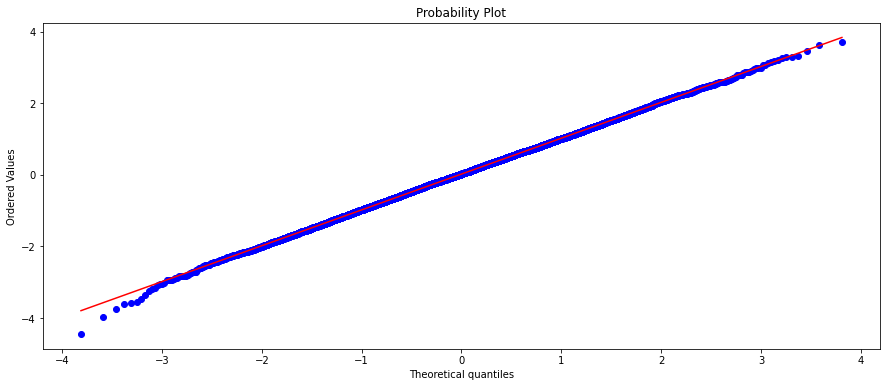

In [42]:
# q-q plot of a normal distribution
plt.figure(figsize=(15,6))
stats.probplot(normal_dist, dist="norm", plot=plt)
plt.show()

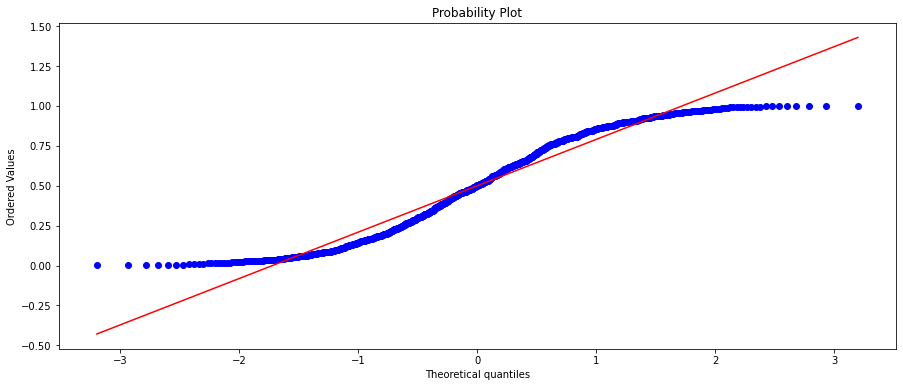

In [43]:
# q-q plot of a uniform/random distribution
plt.figure(figsize=(15,6))
stats.probplot(uniform_dist, dist="norm", plot=plt) 
plt.show()

## Выбросы

Выброс - это наблюдение, которое отличается от других наблюдений. Выбросы часто выделяются и могут являться ошибкой.

Выбросы могут испортить ваши статистические модели. Однако выбросы следует удалять только тогда, когда вы имеете веские причины для удаления выбросов.

Иногда выбросы являются главной темой, представляющей интерес. Это, например, случай с обнаружением мошенничества. Существует множество методов обнаружения выбросов, но здесь мы обсудим тест Граббса и метод Тьюки. Оба теста предполагают, что данные распределены нормально.

### Тест Граббса

В тесте Граббса нулевая гипотеза состоит в том, что ни одно наблюдение не является выбросом, в то время как альтернативная гипотеза состоит в том, что есть одно наблюдение являющееся выбросом. Таким образом, тест Граббса ищет только один выброс.

Формула теста Граббса:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/bafc310f1dbca658728c73256fed19b6a7f11130)

Где Y_hat - выборочное среднее, а s - стандартное отклонение. Статистика критерия Граббса - это наибольшее абсолютное отклонение от выборочного среднего в единицах стандартного отклонения выборки.

[Источник](https://en.wikipedia.org/wiki/Grubbs%27_test_for_outliers)


### Метоб Тьюки

Тьюки предположил, что наблюдение является выбросом, если наблюдение в 1,5 раза превышает межквартильный диапазон ниже первого квартиля или в 1,5 раза превышает межквартильный диапазон выше третьего квартиля. Это может показаться сложным, но это довольно интуитивно понятно, если вы это провизуализируете.

Для нормальных распределений критерий Тьюки подходит для наблюдения за выбросами, но к использованию критериев Тьюки для других распределений следует относиться с недоверием.

Формула метода Тьюки:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/2a103bbd9233d9f8f711a7c76dfeb9694446f860)

Ya - большее из двух сравниваемых средств. SE - стандартная ошибка суммы средних.

[Источник](https://en.wikipedia.org/wiki/Tukey%27s_range_test)


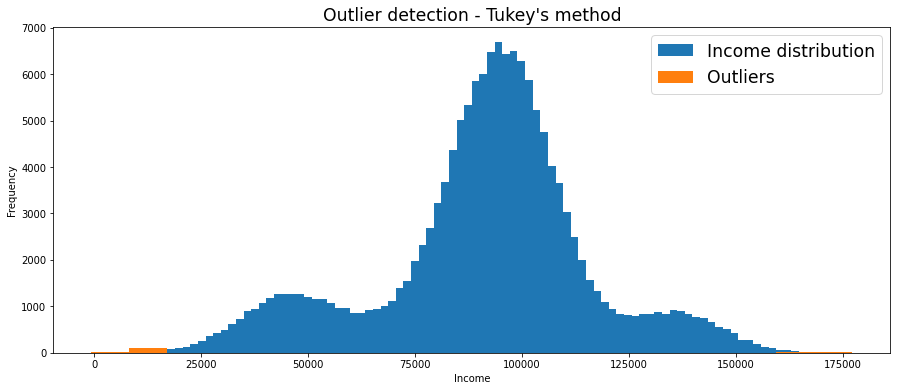

In [46]:
# Detect outliers on the 'Income' column of the Toy Dataset

# Function for detecting outliers a la Tukey's method using z-scores
def tukey_outliers(data) -> list:
    # For more information on calculating the threshold check out:
    # https://medium.com/datadriveninvestor/finding-outliers-in-dataset-using-python-efc3fce6ce32
    threshold = 3
    
    mean = np.mean(data)
    std = np.std(data)
    
    # Spot and collect outliers
    outliers = []
    for i in data:
        z_score = (i - mean) / std
        if abs(z_score) > threshold:
            outliers.append(i)
    return outliers

# Get outliers
income_outliers = tukey_outliers(df['Income'])

# Visualize distribution and outliers
plt.figure(figsize=(15,6))
df['Income'].plot(kind='hist', bins=100, label='Income distribution')
plt.hist(income_outliers, bins=20, label='Outliers')
plt.title("Outlier detection - Tukey's method", fontsize='xx-large')
plt.xlabel('Income')
plt.legend(fontsize='xx-large')
plt.show()

## Переобучение

Наша модель переобучается, если она также моделирует «шум» в данных. Это означает, что модель не будет хорошо работать на новых данных, даже если ошибка в обучающих данных станет очень маленькой. Маловероятно, что линейные модели переобучатся, но по мере того, как модели становятся более гибкими, мы должны опасаться переобучения. Наша модель также может быть недообученной, что означает, что она имеет большую ошибку в обучающих данных.

Поиск оптимального соотношения между переобучением и недообучением  называется "Дилемма смещения–дисперсии" (https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff). Неплохо бы знать эту теорему, но еще важнее понять, как ее использовать. Ниже я объясню некоторые подходы как это сделать.

### Как избежать переобучения?

1. Разделите данные на выборку для обучения и выборку для тестирования.
2. Регуляризация: ограничьте гибкость модели.
3. Перекрестная проверка - кросс валидация

### Cross Validation

Перекрестная проверка - это метод оценки точности нашей статистической модели. Перекрестная проверка поможет нам распознать переобучение и проверить, сводится ли наша модель на новые (вне выборки) данные.

Популярный метод кросс валидации называется k-fold валидация. Идея проста: мы разбиваем наш набор данных на k наборов данных, и из каждого набора данных k мы выбираем несколько образцов. Затем мы применяем нашу модель к остальной части k и пытаемся предсказать выбранные нами выборки. Мы используем такую метрику, как среднеквадратичная ошибка, чтобы оценить, насколько хороши наши прогнозы. Эта процедура повторяется, а затем мы смотрим на среднее значение прогнозов по множеству наборов данных перекрестной проверки.

Для получения дополнительной информации о перекрестной проверке [посетите этот блог](https://machinelearningmaster.com/k-fold-cross-validation/).

## Обобщённая линейная модель (GLMs)

### Связующая функция

Обобщенные линейные модели включают связующую функцию, которая связывает ожидаемое значение с линейными предикторами в модели. Функция связи преобразует вероятности уровней категориальной переменной в непрерывную неограниченную шкалу. После завершения преобразования отношения между предикторами и откликом можно смоделировать с помощью линейной регрессии. Например, переменная двоичного ответа может иметь два уникальных значения. Преобразование этих значений в вероятности приводит к изменению диапазона переменной отклика от 0 до 1. Когда вы применяете соответствующую связующую функцию  к вероятностям, получаемые числа находятся в диапазоне от −∞ до + ∞.

Часто используемая связующую функция называется обратным логитом или логистической сигмоидной функцией.

Функция связи обеспечивает связь между линейным предиктором и средним значением распределения.

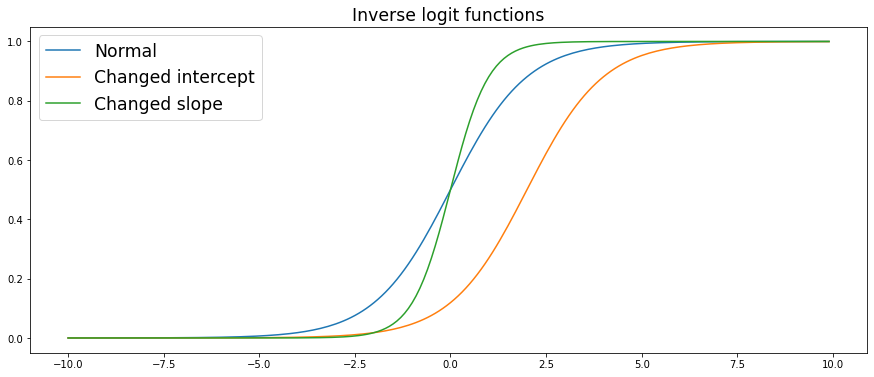

In [47]:
# Inverse logit function (link function)
def inv_logit(x):
    return 1 / (1 + np.exp(-x))

t1 = np.arange(-10, 10, 0.1)
plt.figure(figsize=(15,6))
plt.plot(t1, inv_logit(t1), 
         t1, inv_logit(t1-2),   
         t1, inv_logit(t1*2))
plt.title('Inverse logit functions', fontsize='xx-large')
plt.legend(('Normal', 'Changed intercept', 'Changed slope'), fontsize='xx-large')

### Логистическая регрессия

При логистической регрессии мы используем связующую функцию, такую как упомянутая выше обратная логит-функция, для моделирования двоичной зависимой переменной. В то время как модель линейной регрессии напрямую предсказывает ожидаемое значение y при заданном x, GLM использует связующую функцию.

Мы можем легко реализовать логистическую регрессию с помощью [функции логистической регрессии sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [48]:
# Simple example of Logistic Regression in Python
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

# Logistic regression classifier
clf = LogisticRegression(random_state=0, 
                         solver='lbfgs',
                         multi_class='multinomial').fit(X, y)

print('Accuracy score of logistic regression model on the Iris flower dataset: {}'.format(clf.score(X, y)))


Accuracy score of logistic regression model on the Iris flower dataset: 0.9733333333333334


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


![](https://www.meme-arsenal.com/memes/58458347fd916f9d856ccbdd09c09a2d.jpg)

# The end!